2.1. Problem Statement:Numpy
Problem Statement 1:

Write a function so that the columns of the output matrix are powers of
the input vector.
The order of the powers is determined by the increasing boolean argument. Specifically, when
increasing is False, the i-th output column is the input vector raised element-wise to the power
of N - i - 1.

HINT: Such a matrix with a geometric progression in each row is named for Alexandre-
Theophile Vandermonde.

In [1]:
import numpy as np
import pandas as pd
def vendorminde(lst):
    VanderMtx= []
    for num in lst:
        for j in range(len(lst)):
            VanderMtx.append(num**j)
    Mtx= np.array(VanderMtx) #np.array.reshape(len(lst),lrn(lst))
    return Mtx.reshape(len(lst),len(lst))
                

In [2]:
lst=[]
vendorminde([1,2,3,4,5])

array([[  1,   1,   1,   1,   1],
       [  1,   2,   4,   8,  16],
       [  1,   3,   9,  27,  81],
       [  1,   4,  16,  64, 256],
       [  1,   5,  25, 125, 625]])

Problem Statement 2:

Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average
of the given sequence is defined as follows:

The moving average sequence has n-k+1 elements as shown below.

The moving averages with k=4 of a ten-value sequence (n=10) is shown below

i 1 2 3 4 5 6 7 8 9 10
===== == == == == == == == == == ==
Input 10 20 30 40 50 60 70 80 90 100

y1 25 = (10+20+30+40)/4

y2 35 = (20+30+40+50)/4

y3 45 = (30+40+50+60)/4

y4 55 = (40+50+60+70)/4

y5 65 = (50+60+70+80)/4

y6 75 = (60+70+80+90)/4

y7 85 = (70+80+90+100)/4

Thus, the moving average sequence has n-k+1=10-4+1=7 values.

In [7]:
a=int(input("please enter start range of list="))
b=int(input("please enter stop range of list="))
c=int(input("please enter step sixe of list="))
inp=list(range(a,b,c))
n=(len(inp))
k=4
mas=n-k+1
for i in range(mas):
    y=0
    for j in range(k):
        y=y+inp[i+j]
    print("y",i+1,"=",y/k)   

please enter start range of list= 10
please enter stop range of list= 110
please enter step sixe of list= 10


y 1 = 25.0
y 2 = 35.0
y 3 = 45.0
y 4 = 55.0
y 5 = 65.0
y 6 = 75.0
y 7 = 85.0


Question: Write a function to find moving average in an array over a window:

Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

In [8]:
def moving_avg(arr,n):
    inr=len(arr)-n+1
    for i in range(inr):
        y=0
        for j in range(n):
            y=y+arr[i+j]
        print(y/n)    

In [9]:
moving_avg([3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150],3)

5.0
4.666666666666667
5.666666666666667
6.666666666666667
9.666666666666666
28.666666666666668
49.333333333333336
72.66666666666667
84.0
93.33333333333333
116.33333333333333


2.2. Problem Statement: Pandas

Problem Statement 1:

1) How-to-count-distance-to-the-previous-zero
For each value, count the difference of the distance from the previous zero (or the start
of the Series, whichever is closer) and if there are no previous zeros, print the position
Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}
The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.
import pandas as pd
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [12]:
import pandas as pd
df=pd.DataFrame({'x': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [13]:
x=[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]
y=[]
a=0
for i in x:
    if i!=0:
        y.append(a+1)
        a=a+1
    elif i==0:
        y.append(0)
        a=0
print(y)        


[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]


In [14]:
df["y"]=y

In [15]:
df.head()

,x,y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2


2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a
Series of random numbers.

In [15]:
import pandas as pd
import numpy as np

def create_calendar(start='2015-1-1', end='2015-12-31'):
    random_numbers=np.random.randint(low=1,high=365,size=365)
    df=pd.DataFrame({"Date":pd.bdate_range(start,end)})
    lengthdf=len(df)
    df["random_index"]=np.random.randint(low=1,high=100,size=lengthdf)
    df["month"]=df.Date.dt.day
    df["day"]=df.Date.dt.weekday_name
    return df
create_calendar().head()

,Date,random_index,month,day
0,2015-01-01,67,1,Thursday
1,2015-01-02,43,2,Friday
2,2015-01-05,49,5,Monday
3,2015-01-06,47,6,Tuesday
4,2015-01-07,70,7,Wednesday


3) Find the sum of the values in s for every Wednesday

In [16]:
s=create_calendar()
wednes=np.where(s['day']=='Wednesday')
wednes_values=s.loc[wednes]
all_wednesday_random_sum=wednes_values["random_index"].sum()
all_wednesday_random_sum

2858

4) Average For each calendar month

In [17]:
s=create_calendar()
each_month=s.groupby(by=s["month"])
each_months_sum=each_month.random_index
monthly_average=each_months_sum.mean()
np.round(monthly_average,decimals=1).head

<bound method NDFrame.head of month
1     54.9
2     41.2
3     44.0
4     64.8
5     60.8
6     56.0
7     62.4
8     52.6
9     43.4
10    58.9
11    39.1
12    65.4
13    34.1
14    54.0
15    26.1
16    53.1
17    47.2
18    66.9
19    59.0
20    70.8
21    28.0
22    60.5
23    58.7
24    45.4
25    66.6
26    62.5
27    47.8
28    58.8
29    64.4
30    49.0
31    48.2
Name: random_index, dtype: float64>

5) For each group of four consecutive calendar months in s, find the date on which the
highest value occurred.

In [21]:
s=create_calendar()
d=s.groupby(s["month"]%4).agg(['max','idxmax'])
d

Date        random_index        month       
             max idxmax          max idxmax   max idxmax
month                                                   
0     2015-12-28    257           95    243    28     19
1     2015-12-29    258           99    166    29     20
2     2015-12-30    259           98      1    30     21
3     2015-12-31    260           99    151    31     63

Problem Statement 2:

Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Nam
es_right.csv

Questions:
1) Delete unnamed columns

In [2]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")

In [3]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data.head

<bound method NDFrame.head of               Id     Name  Year Gender State  Count
0          11350     Emma  2004      F    AK     62
1          11351  Madison  2004      F    AK     48
2          11352   Hannah  2004      F    AK     46
3          11353    Grace  2004      F    AK     44
4          11354    Emily  2004      F    AK     41
...          ...      ...   ...    ...   ...    ...
1016390  5647422     Seth  2014      M    WY      5
1016391  5647423  Spencer  2014      M    WY      5
1016392  5647424     Tyce  2014      M    WY      5
1016393  5647425   Victor  2014      M    WY      5
1016394  5647426   Waylon  2014      M    WY      5

[1016395 rows x 6 columns]>

2) Show the distribution of male and female

In [5]:
data.head(5)
gender_distribution=data.groupby(by=data["Gender"])["Count"].count()
gender_distribution

Gender
F    558846
M    457549
Name: Count, dtype: int64

3) Show the top 5 most preferred names

In [6]:
data["Name"].value_counts().head(5)

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

4) What is the median name occurrence in the dataset

In [7]:
data.Name[data["Count"].median()]

'Elizabeth'

5) Distribution of male and female born count by states

In [12]:
born_count=data.groupby(['State','Gender'])['Count'].count()
born_count.head(12)

State  Gender
AK     F          2404
       M          2587
AL     F          9878
       M          8419
AR     F          7171
       M          6475
AZ     F         14518
       M         10820
CA     F         45144
       M         31637
CO     F         11424
       M          9183
Name: Count, dtype: int64

2.3. Problem Statement: Use Cases on Numpy and Pandas

1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception
handling using try-catch which gives the output as:

Output:

1) If the List element is a alphabet or string, the output will be
The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

2) If the List element is “0”,the output will be
The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

3) If the List element is and integer except 0,then output will be:
The entry is 2
The reciprocal of 2 is 0.5 // reciprocal of an integer

In [26]:
randomlist=["a",0,2]
try:
    for i in randomlist:
        if str(i).isalpha()==True:
            print("The entry is"+i)
            print("Oops!<class'ValueError'> occured"+"\n"+"_"*50+"\n")
                  
        elif int(i)==0:
            print("The entry is",i)
            print("Oops!<class'Zero Division Error'> occured"+"\n"+"_"*50+"\n") 
                  
        elif int(i)/2==True:
            print("The entry is ",i)
            print("Reciprocal of "+ str(i)+" is",1/i)
            break
        else:
             print("invalid")
finally:
    print("Next entry")              

The entry isa
Oops!<class'ValueError'> occured
__________________________________________________

The entry is 0
Oops!<class'Zero Division Error'> occured
__________________________________________________

The entry is  2
Reciprocal of 2 is 0.5
Next entry


2) Array out of Bound Exception
Write a Python program to give exception “Array Out of Bound” if the user wants to access the
elements beyond the list size (use try and except)

In [27]:
try:
    lst=[2,4,6]
    print(lst[3])
except :
    print("Array out of Bond.")

Array out of Bond.


3) Write a python module script that contains fib2() method to calculate the Fibonacci series
till 1000 and save it as fibo.py.
Note : The module created as fibo.py has to be placed in lib folder
For linux/ubuntu path = /home/anaconda/lib/python3
For Windows path = C:\Users\Ajit\Anaconda3\Lib

In [35]:
# import OS.path
# save_path=' C:\Users\Ajit\Anaconda3\Lib'
#def feb2():
#    nterms = int(1000)
#    n1, n2 = 0,1
#    count = 0
#    if nterms <= 0:
#       print("Please enter a positive integer")
#    elif nterms == 1:
#       print("Fibbonacci seqence upto",nterms,":")
#       print(n1)
#    else:
#       print("Fibonnaci sequence:")
#       while count < nterms:
#            print(n1)
#            nth = n1 + n2
#            # update values
#            n1 = n2
#            n2 = nth
#            count +=1
#feb2()

In [ ]:
import fibo
print(feb2)

4) Write a python module script that contains ispalindrome() method to calculate the input
string as palindrome string or not and save it as palindrome.py.

In [53]:
# def ispalindrome(a) :
#     if a[::-1]==a:
#        return("String is pal indrome ")
#     else:
#       return("Strings is not pal indrome")

In [ ]:
import palindrome
print(palindrome.ispalindrome("racecar"))

5) Write a program in Python with one class called Cipher. Within the constructor of this
class, ask user for a string and store it. Use a static variable, key to store a randomly
generated integer between 1 and 50 inclusive. Implement two methods, encrypt and
decrypt within this class. Encrypt generates and prints a cipher text using the user-entered
string and the key and ecrypt generates decrypted string from ciphertext. The cipher only
encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted.
The cipher text can have special characters. Use generator expression to filter out alpha and
numeric characters of the input string and to generate cipher text. Create an instance of this
class, encrypt and decrypt back the user entered string.

In [ ]:
import numpy as np
class Cypher:
    def__init__(self,text):
        print("Original Text: "+str(text))
        self.text=text
        self.key=np.randint(low=1,high=5,size=len(text))
        self.encrypted_text=""
        self.decrypted_text=""
    def generate_cypher(self,string):
        for char in string:
            if char.isalnum():
                yield char
            else:
                yield None
              

6) Get Data from the following link:

http://files.grouplens.org/datasets/movielens/ml-20m.zip
We will be using the following files for this exercise:
ratings.csv : userId,movieId,rating, timestamp
tags.csv : userId,movieId, tag, timestamp
movies.csv : movieId, title, genres


I. Read the dataset using pandas.

In [ ]:
import pandas as pd
import os
os.chdir("I:\")
os.getcwd()
ratings=pd.read_csv("ratings.csv")
tags=pd.read_csv("tags.csv")
movies=pd.read_csv("movies.csv")

II. Extract the first row from tags and print its type.

In [ ]:
print(tags.dtypes)
tags.head(1)

III. Extract row 0, 11, 2000 from tags DataFrame.

In [ ]:
tags.iloc[[0,11,2000]]

IV. Print index, columns of the DataFrame.

In [ ]:
tags.head

2.4. Problem Statement: Matplotlib
    
Matplotlib:
This assignment is for visualization using matplotlib:
    
data to use:
url=2.4. Problem Statement: Matplotlib
Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:

In [56]:
titanic=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

1. Create a pie chart presenting the male/female proportion

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
male=titanic.loc[titanic.sex=="male"]
nmale=len(male)
print(nmale)
female=titanic.loc[titanic.sex=="female"]
nfemale=len(female)
print(nfemale)

843
466


In [67]:
per_male=nmale/(nmale+nfemale)*100
per_female=nfemale/(nmale+nfemale)*100
print(per_male)
print(per_female)

64.40030557677616
35.59969442322384


([<matplotlib.patches.Wedge at 0x2b06bddd088>,
 [Text(-0.764967886879411, 1.5739517565806296, 'Male Propertion'),
  Text(0.7212555751437824, -1.48401158867578, 'Female Properstion')],
 [Text(-0.4371245067882348, 0.8994010037603595, '64.40%'),
  Text(0.3934121318966085, -0.8094608665504253, '35.60%')])

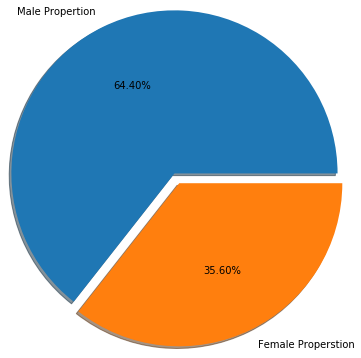

In [69]:
male_vs_female=[per_male,per_female]
male_vs_female_lbls=["Male Propertion","Female Properstion"]
plt.figure(figsize=(15,5))
plt.pie(male_vs_female,labels=male_vs_female_lbls,shadow=True, autopct="%1.2f%%",radius=1.5,explode=[.1,0])

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

AttributeError: 'AxesSubplot' object has no attribute 'set_xlable'

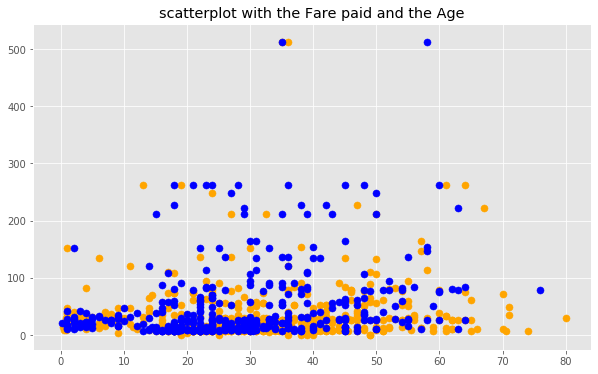

In [73]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
axis=plt.subplot()
axis.scatter(titanic[titanic.sex=="male"]['age'],titanic[titanic.sex=='male']['fare'],c="orange",s=50)
axis.scatter(titanic[titanic.sex=="female"]['age'],titanic[titanic.sex=='female']['fare'],c="blue",s=50)
axis.set_title("scatterplot with the Fare paid and the Age")
axis.set_xlable("fare")
axis.set_ylable("age")
axis.legend('Male','Female')

2.5. Problem Statement: Data Cleaning

It happens all the time: someone gives you data containing malformed strings, Python, lists

and missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

1. Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).

In [51]:
import numpy as np
import pandas as pd
flight=pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})
                     

In [52]:
print(flight.dtypes)
flight.head()

From_To          object
FlightNumber    float64
RecentDelays     object
Airline          object
dtype: object


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""
